## Scraping Tools

# For interacting with web pages

• requests <br>
• selenium <br>
• scrapy

For interacting with html <br>
• bs4

For all above <br>
• HTML & CSS

Scrape Apple & Samsung mobile phone data from ebay whose Buying Format's are "Buy It Now"


In [3]:
#pip install selenium

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/f9/2f/9c6eef6487faca5006ae1ba43cf6ab627c7e3d2a7ec5a3b8728e2105472d/selenium-4.12.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/a5/a6/06e2373f95c12e9e8f6b910a76c86e375348ead77ab476230640666310fb/trio_websocket-0.10.3-py3-none-any.whl.metadata
  Obtaining dependency information for exceptiongroup from https://files.pythonhosted.org/packages/ad/83/b71e58666f156a39fb29417e4c8ca4bc7400c0dd4ed9e8842ab54dc8c344/exceptiongroup-1.1.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     -----------

In [36]:
from bs4 import BeautifulSoup as bs
from datetime import datetime
from selenium import webdriver
import pandas as pd
import numpy as np 
import time

https://www.imagetotext.info/
https://brandfolder.com/workbench/extract-text-from-image

1- Go to ebay
2- search "mobile phones"
3- select apple and samsung
4- select "buy it now"
!!! filter from the website, for a data guy, just filter the website then work on that url

In [ ]:
# https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile+phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=nc&LH_BIN=1
# page 4 https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile+phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=nc&LH_BIN=1&_pgn=4
# page 55 https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile+phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=nc&LH_BIN=1&_pgn=55
# max page 165 https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile+phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=nc&LH_BIN=1&_pgn=165

it has a 10000 results limit, so you can work with that limit

In [2]:
html_text = """<li data-viewport="{&quot;trackableId&quot;:&quot;01H9CJGYY6S9PFF15P42KGK3WS&quot;}" id="item44bf702257" class="s-item s-item__pl-on-bottom" data-view="mi:1686|iid:2"><div class="s-item__wrapper clearfix"><!--F#f_0--><div class="s-item__image-section"><div class="s-item__image"><a data-interactions="[{&quot;actionKind&quot;:&quot;NAVSRC&quot;,&quot;interaction&quot;:&quot;wwFVrK2vRE0lhQQ0MDFIOUNKR1laV1hIRDQ3WU1HNTFYVkM2SjY0MDFIOUNKR1lZNlM5UEZGMTVQNDJLR0szV1MAAAg3NDAwDE5BVlNSQwA=&quot;}]" tabindex="-1" target="_blank" data-carousel-tabindex="-1" aria-hidden="true" data-s-sutz741="{&quot;eventFamily&quot;:&quot;LST&quot;,&quot;eventAction&quot;:&quot;ACTN&quot;,&quot;actionKind&quot;:&quot;NAVSRC&quot;,&quot;actionKinds&quot;:[&quot;NAVSRC&quot;],&quot;operationId&quot;:&quot;2351460&quot;,&quot;flushImmediately&quot;:false,&quot;eventProperty&quot;:{&quot;$l&quot;:&quot;1219666782821369&quot;}}" _sp="p2351460.m1686.l7400" href="https://www.ebay.com/itm/295269573207?epid=21036891491&amp;hash=item44bf702257%3Ag%3A-XIAAOSw1rNjcmps&amp;amdata=enc%3AAQAIAAAA8JQrTO1j46Ths%2BqgdMgrtUkPSlxv59ALu4%2BbkLQHo1MyjtMcfaud4L3GMdIZxbmTXS4iXPXYUqCFERk8zR38c0xOu5ZN0CTX3hLtEwsdSU2DstL5skORZGiCksl36YNGfrWaMhUcT8eHgPIMKOX%2Bhe9Y%2FhTMGJhtBnkBqOZlzdZ7%2FOP9QmN15WRXH7C55FEjfGc%2BFcoEFwzYx5EVzUqgy5rUWLYyGq6EXw9JmqDMhIpKEUK2DGOcgKxN9ey0z9PWD0cjPJzWvuUUX%2FdxD5%2FRQ5R3QFclLbYpHF7vS%2BznmtfljaBJ8DGdDHvFyOay2U%2BbJg%3D%3D%7Ctkp%3ABFBMlO_Dksti&amp;LH_BIN=1"><div class="s-item__image-wrapper image-treatment"><img src="https://i.ebayimg.com/thumbs/images/g/-XIAAOSw1rNjcmps/s-l300.webp" loading="eager" fetchpriority="high" onload="SITE_SPEED.ATF_TIMER.measure(this);;if(this.width === 80 &amp;&amp; this.height === 80) {window.SRP.metrics.incrementCounter('imageEmptyError');}" onerror="window.SRP.metrics.incrementCounter('imageLoadError');" alt="Samsung S20 Ultra 5G Unlocked G988U 128GB Spot" data-atftimer="1693712938146"></div></a></div></div><div class="s-item__info clearfix"><a data-interactions="[{&quot;actionKind&quot;:&quot;NAVSRC&quot;,&quot;interaction&quot;:&quot;wwFVrK2vRE0lhQQ0MDFIOUNKR1laV1hIRDQ3WU1HNTFYVkM2SjY0MDFIOUNKR1lZNlM5UEZGMTVQNDJLR0szV1MAAAg3NDAwDE5BVlNSQwA=&quot;}]" target="_blank" data-s-sutz741="{&quot;eventFamily&quot;:&quot;LST&quot;,&quot;eventAction&quot;:&quot;ACTN&quot;,&quot;actionKind&quot;:&quot;NAVSRC&quot;,&quot;actionKinds&quot;:[&quot;NAVSRC&quot;],&quot;operationId&quot;:&quot;2351460&quot;,&quot;flushImmediately&quot;:false,&quot;eventProperty&quot;:{&quot;$l&quot;:&quot;1219666782821369&quot;}}" _sp="p2351460.m1686.l7400" class="s-item__link" href="https://www.ebay.com/itm/295269573207?epid=21036891491&amp;hash=item44bf702257%3Ag%3A-XIAAOSw1rNjcmps&amp;amdata=enc%3AAQAIAAAA8JQrTO1j46Ths%2BqgdMgrtUkPSlxv59ALu4%2BbkLQHo1MyjtMcfaud4L3GMdIZxbmTXS4iXPXYUqCFERk8zR38c0xOu5ZN0CTX3hLtEwsdSU2DstL5skORZGiCksl36YNGfrWaMhUcT8eHgPIMKOX%2Bhe9Y%2FhTMGJhtBnkBqOZlzdZ7%2FOP9QmN15WRXH7C55FEjfGc%2BFcoEFwzYx5EVzUqgy5rUWLYyGq6EXw9JmqDMhIpKEUK2DGOcgKxN9ey0z9PWD0cjPJzWvuUUX%2FdxD5%2FRQ5R3QFclLbYpHF7vS%2BznmtfljaBJ8DGdDHvFyOay2U%2BbJg%3D%3D%7Ctkp%3ABFBMlO_Dksti&amp;LH_BIN=1"><div class="s-item__title"><span role="heading" aria-level="3"><!--F#f_0-->Samsung S20 Ultra 5G Unlocked G988U 128GB Spot<!--F/--></span></div><span class="clipped">Opens in a new window or tab</span></a><div class="s-item__subtitle"><!--F#f_0-->BLEMISH*Accessories Included*Choice of Color*WARRANTY<!--F/--></div><div class="s-item__subtitle"><!--F#f_0--><span class="SECONDARY_INFO">Pre-Owned</span><!--F/--></div><div class="s-item__reviews"><a _sp="p2351460.m4114.l8597" href="https://www.ebay.com/p/21036891491?iid=295269573207&amp;var=593459068632#UserReviews"><div class="x-star-rating"><svg class="icon icon--star-filled-16" focusable="false" aria-hidden="true"><use xlink:href="#icon-star-filled-16"></use></svg><svg class="icon icon--star-filled-16" focusable="false" aria-hidden="true"><use xlink:href="#icon-star-filled-16"></use></svg><svg class="icon icon--star-filled-16" focusable="false" aria-hidden="true"><use xlink:href="#icon-star-filled-16"></use></svg><svg class="icon icon--star-filled-16" focusable="false" aria-hidden="true"><use xlink:href="#icon-star-filled-16"></use></svg><svg class="icon icon--star-half-16-colored" focusable="false" aria-hidden="true"><use xlink:href="#icon-star-half-16-colored"></use></svg><span class="clipped">4.5 out of 5 stars.</span></div><span class="s-item__reviews-count"><span aria-hidden="false"><!--F#f_0-->162 product ratings<!--F/--></span><span class="clipped"> - Samsung S20 Ultra 5G Unlocked G988U 128GB Spot</span></span></a></div><div class="s-item__details clearfix"><div class="s-item__detail s-item__detail--primary"><span class="s-item__price"><!--F#f_0--><!--F#f_0-->$189.00<!--F/--><!--F/--></span></div><span class="s-item__detail s-item__detail--secondary"><span class="s-item__etrs"><span><span><span class="tooltip" id="nid-ttu-49"><button aria-label="Top Rated Plus" class="tooltip__host" aria-expanded="false" aria-controls="s0-53-17-6-3-3[2]-10-1-29[0[1[0]]]-0-10-overlay" aria-describedby="s0-53-17-6-3-3[2]-10-1-29[0[1[0]]]-0-10-overlay"><span aria-hidden="true" class="s-item__etrs-new-plus"></span><svg class="s-item__etrs-new__svg" aria-hidden="true" width="15.75px" height="18px"><use xlink:href="#svg-icon-top-plus"></use></svg></button><span id="s0-53-17-6-3-3[2]-10-1-29[0[1[0]]]-0-10-overlay" class="tooltip__overlay" role="tooltip" style="top:100%;left:-50%;"><span class="tooltip__pointer tooltip__pointer--top-left"></span><span class="tooltip__mask"><span class="tooltip__cell"><span class="tooltip__content"><b><!--F#f_0-->Top Rated Plus<!--F/--></b><br><ul class="s-item__etrs-tooltip--list"><li><!--F#f_0-->Sellers with highest buyer ratings<!--F/--></li><li><!--F#f_0-->Returns, money back<!--F/--></li><li><!--F#f_0-->Ships in a business day with tracking<!--F/--></li></ul><a href="http://pages.ebay.com/trp/index.html"><!--F#f_0-->Learn More<!--F/--></a></span></span></span></span></span></span></span><span class="s-item__etrs-text"><!--F#f_0-->Top Rated Plus<!--F/--></span></span></span><div class="s-item__detail s-item__detail--primary"><span class="s-item__purchase-options s-item__purchaseOptions"><!--F#f_0-->Buy It Now<!--F/--></span></div><span class="s-item__detail s-item__detail--secondary"><span class="s-item__seller-info"><span class="s-item__seller-info-text">lvlupsales (1,688) 99.4%</span></span></span><div class="s-item__detail s-item__detail--primary"><span class="s-item__shipping s-item__logisticsCost"><!--F#f_0-->Free shipping<!--F/--></span></div><div class="s-item__detail s-item__detail--primary"><span class="s-item__free-returns s-item__freeReturnsNoFee"><!--F#f_0-->Free returns<!--F/--></span></div><div class="s-item__detail s-item__detail--primary"><span class="s-item__dynamic s-item__quantitySold"><!--F#f_0--><span class="BOLD">45+ sold</span><!--F/--></span></div><div class="s-item__detail s-item__detail--primary"><span class="s-item__sep"> <div></div></span><span class="s-item__space_bar"></span></div></div></div><!--F/--></div></li>"""

text_html = bs(html_text, 'html.parser')


In [3]:
text_html.find(class_= 's-item__title')

<div class="s-item__title"><span aria-level="3" role="heading"><!--F#f_0-->Samsung S20 Ultra 5G Unlocked G988U 128GB Spot<!--F/--></span></div>

In [4]:
text_html.find(class_= 's-item__title').text

'Samsung S20 Ultra 5G Unlocked G988U 128GB Spot'

In [5]:
text_html.find(class_= 's-item__dynamic s-item__quantitySold').text


'45+ sold'

#### find price

In [10]:
text_html.find(class_= 's-item__price').text


'$189.00'

In [37]:
text_html.find(class_= 's-item__price').text.replace('$','').replace(',','')


'189.00'

In [43]:
text_html.a['href']

'https://www.ebay.com/itm/295269573207?epid=21036891491&hash=item44bf702257%3Ag%3A-XIAAOSw1rNjcmps&amdata=enc%3AAQAIAAAA8JQrTO1j46Ths%2BqgdMgrtUkPSlxv59ALu4%2BbkLQHo1MyjtMcfaud4L3GMdIZxbmTXS4iXPXYUqCFERk8zR38c0xOu5ZN0CTX3hLtEwsdSU2DstL5skORZGiCksl36YNGfrWaMhUcT8eHgPIMKOX%2Bhe9Y%2FhTMGJhtBnkBqOZlzdZ7%2FOP9QmN15WRXH7C55FEjfGc%2BFcoEFwzYx5EVzUqgy5rUWLYyGq6EXw9JmqDMhIpKEUK2DGOcgKxN9ey0z9PWD0cjPJzWvuUUX%2FdxD5%2FRQ5R3QFclLbYpHF7vS%2BznmtfljaBJ8DGdDHvFyOay2U%2BbJg%3D%3D%7Ctkp%3ABFBMlO_Dksti&LH_BIN=1'

In [33]:
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("webdriver.chrome.driver=F://web_scraping_ch8/chromedriver.exe")

driver = webdriver.Chrome(options=chrome_options)


In [7]:
total_pages = 3

for i in range(1,total_pages):
    #print(i)
    driver.get('https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile\
            +phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=n\
            c&LH_BIN=1&_pgn='
               +str(i))
    driver.maximize_window()
    time.sleep(np.random.randint(3, 6)) #you need to add this to wait random seconds to run each iterations
    #and also the page will be load entirely so you will not loose any data

In [ ]:
#now click right and click inspect, then find the pattern

this is the class in html:
﻿<ul class="srp-results srp-list clearfix">
    ::before
►<li class="s-item s-item__pl-on-bottom s-item--watch-at-corner" data-view="mi: 1686|iid:1" xpath="1"></li> == $0 ▶ <li class="s-item s-item_pl-on-bottom s-item--watch-at-corner" data-view="mi: 1686|iid:2">...</li>
▶ <li class="s-item s-item_pl-on-bottom s-item--watch-at-corner" data-view-"mi: 1686|iid:3">...</li> <li class="s-item s-item_pl-on-bottom s-item--watch-at-corner" data-view="mi: 1686|iid:4">...</li> <li class="s-item s-item_pl-on-bottom s-item--watch-at-corner" data-view-"mi: 1686|iid:5">...</li> <li class="s-item s-item pl-on-bottom s-item--watch-at-corner" data-view-"mi: 1686|iid:6"></li> <li class="s-item s-item_pl-on-bottom s-item--watch-at-corner" data-view="mi: 1686|iid:7">...</li> ►<li class="s-item sitem_pl-on-bottom s-item--watch-at-corner" data-view-"mi: 1686|iid:8">...</li> <li class="s-item s-item_pl-on-bottom s-item--watch-at-corner" data-view-"mi: 1686|iid:9">...</li> ▶ <li class="s-item s-item_pl-on-bottom s-item--watch-at-corner" data-view="mi: 1686|iid:10"></li>
﻿

this is the code to get the elements:
phones = driver.find_elements_by_css_selector("ul[class*= 'results']>li[class*='bottom']")

what does that code means?
------
I need a code like this (phones = driver.find_element) to find the elements


In [8]:
df_phones = pd.DataFrame()
df_phones

""


start = datetime.now()

df_phones = pd.DataFrame(columns=['title','quantity'])

total_pages = 3

for i in range(1,total_pages):
    #print(i)
    driver.get('https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile\
            +phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=n\
            c&LH_BIN=1&_pgn='
               +str(i))
    driver.maximize_window()
    time.sleep(np.random.randint(3, 6)) 
    
    #phones = driver.find_element("ul[class*='results']>li[class*='bottom']")
    phones = driver.find_elements(by="css selector", value="ul[class*='results']>li[class*='bottom']")

    for phone in phones:
        phone_html = bs(phone.get_attribute('innerHTML'), 'html.parser')
        
        title = phone_html.find(class_= 's-item__title').text
        
        quantity_element = phone_html.find(class_='s-item__dynamic s-item__quantitySold')
        if quantity_element is not None:
            quantity = quantity_element.text
        
        df_phones = df_phones.append({'title': title}, ignore_index= True)
        df_phones = df_phones.append({'quantity': quantity}, ignore_index= True)

    
    print(f'page {i} completed')

end = datetime.now()

print(f'Runtime of the program is: {end-start}')



for phone in phones:
    phone_html = bs(phone.get_attribute('innerHTML'), 'html.parser')
    
    title_element = phone_html.find(class_='s-item__title')
    quantity_element = phone_html.find(class_='s-item__dynamic s-item__quantitySold')
    
    if title_element is not None:
        title = title_element.text
    else:
        title = "N/A"  # or any other default value
        
    if quantity_element is not None:
        quantity = quantity_element.text
    else:
        quantity = "N/A"  # or any other default value
    
    df_phones = df_phones.append({'title': title, 'quantity': quantity}, ignore_index=True)


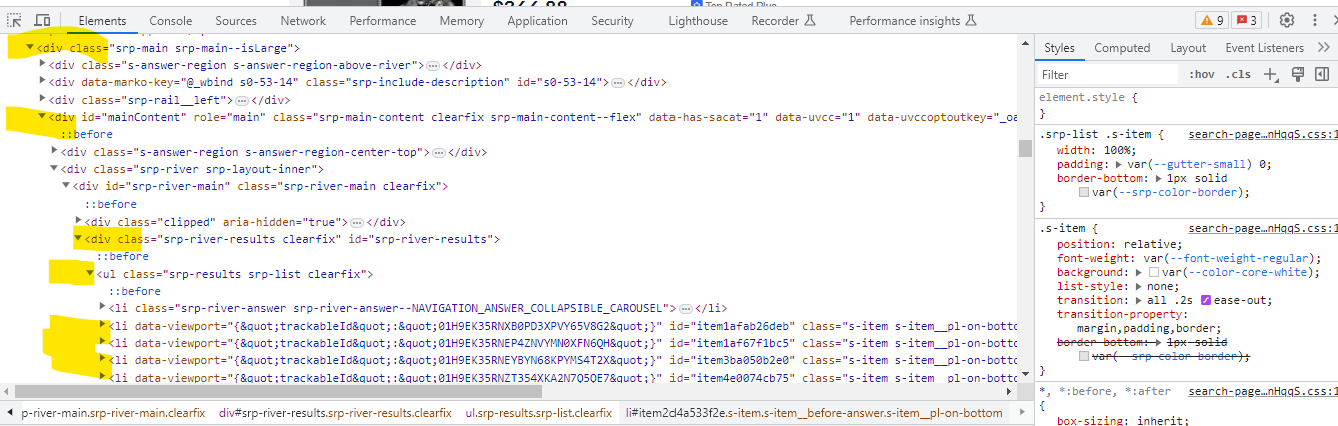

div class="srp-main srp-main--isLarge

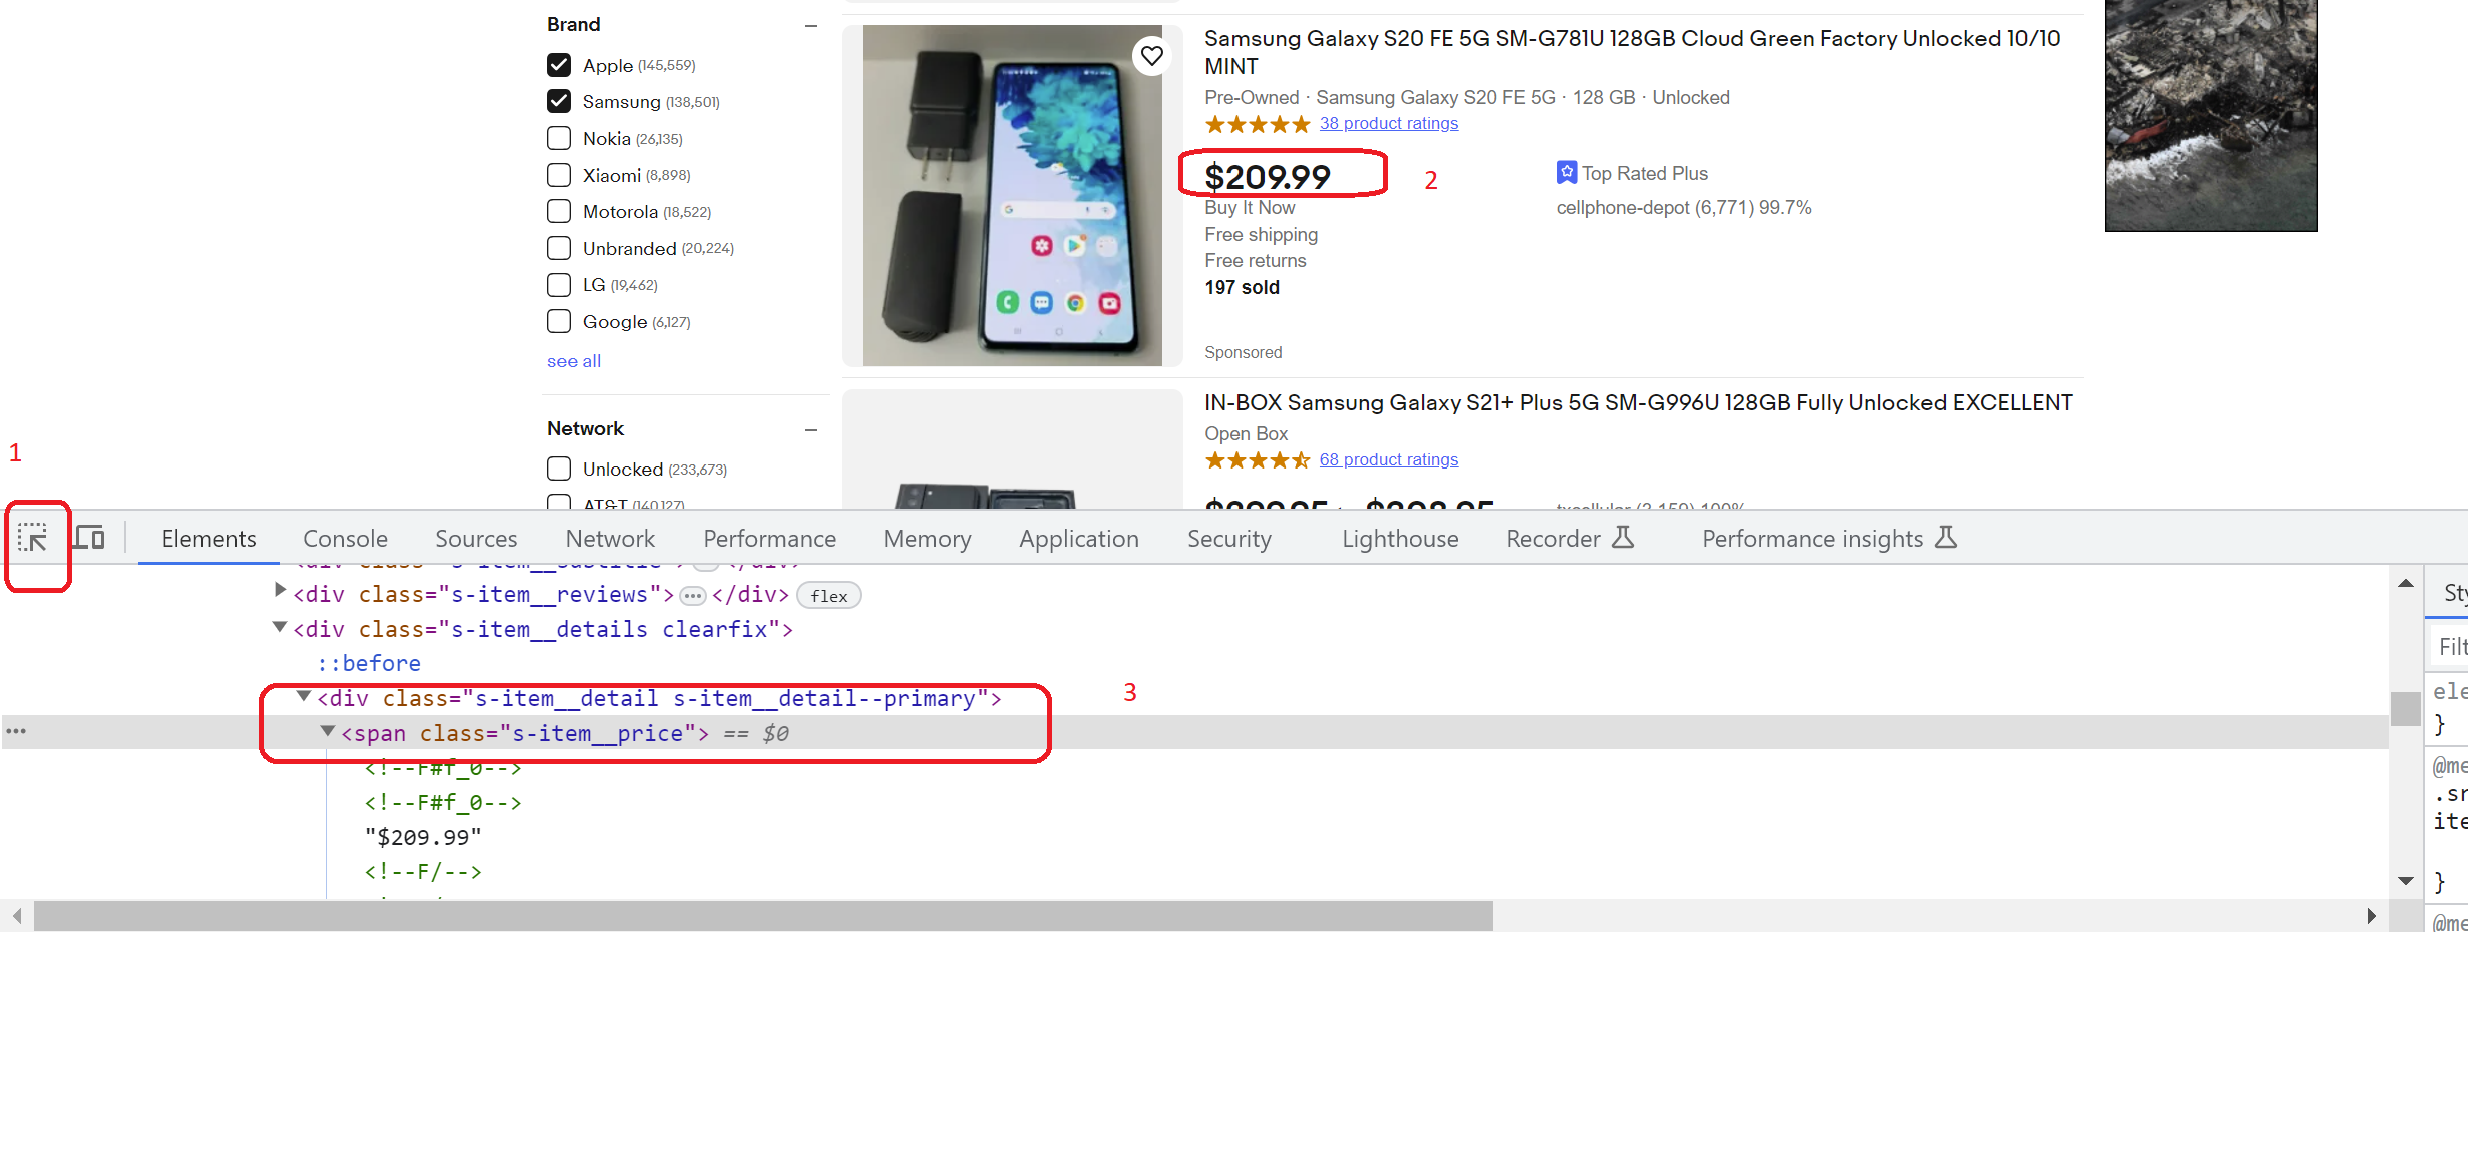

In [21]:
start = datetime.now()

df_phones = pd.DataFrame(columns=['title','quantity_sold', 'price', 'shipping_method'])

total_pages = 3

for i in range(1,total_pages):
    #print(i)
    driver.get('https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile\
            +phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=n\
            c&LH_BIN=1&_pgn='
               +str(i))
    driver.maximize_window()
    time.sleep(np.random.randint(3, 6)) 
    
    #phones = driver.find_element("ul[class*='results']>li[class*='bottom']")
    phones = driver.find_elements(by="css selector", value="ul[class*='results']>li[class*='bottom']")



    for phone in phones:
        phone_html = bs(phone.get_attribute('innerHTML'), 'html.parser')

        title_element = phone_html.find(class_='s-item__title')
        quantity_element = phone_html.find(class_='s-item__dynamic s-item__quantitySold')
        
        price = phone_html.find(class_= 's-item__price').text.replace('$','').replace(',','')
        
        shipping_element = phone_html.find(class_= 's-item__shipping')

        if title_element is not None:
            title = title_element.text
        else:
            title = "N/A"  # or any other default value

        if quantity_element is not None:
            quantity = quantity_element.text
        else:
            quantity = "N/A"  # or any other default value
            
        if shipping_element is not None:
            shipping = shipping_element.text
        else:
            shipping= "N/A"

        #df_phones = df_phones.append({'title': title, 'quantity_sold': quantity, 'price':price}, ignore_index=True)
        new_row = pd.DataFrame({'title': [title], 'quantity_sold': [quantity], 'price': [price], 'shipping_method':[shipping]})
        df_phones = pd.concat([df_phones, new_row], ignore_index=True)


    
    print(f'page {i} completed')

end = datetime.now()

print(f'Runtime of the program is: {end-start}')

page 1 completed
page 2 completed
Runtime of the program is: 0:00:14.959751


In [22]:
df_phones.head(50)

,title,quantity_sold,price,shipping_method
0,"S23 Ultra 5G Smartphone 7.3"" 16GB+1TB Unlocked...",N/A,148.12,Free shipping
1,Samsung Galaxy S20+ Plus 5G G986U Unlocked 128...,777+ sold,188.00,N/A
2,Samsung Galaxy S20 5G G981U Unlocked 128GB Good,581+ sold,174.00,N/A
3,Samsung Galaxy Note 20 5G Boost T-Mobile AT&T ...,N/A,219.99 to 299.99,Free shipping
4,New ListingApple iPhone 12 64GB Unlocked Smart...,N/A,310.00,Free shipping
5,Apple iPhone 13 A2482 128GB Network Unlocked G...,355+ sold,543.59,N/A
6,Apple iPhone XS Max - 512GB - Space Gray (AT&T...,N/A,389.99,N/A
7,Apple iPhone 11 64GB 128GB Verizon T-Mobile AT...,116+ sold,188.00 to 366.00,Free shipping
8,Samsung Galaxy S21 5G 128GB G991U Fully Unloc...,"4,332+ sold",209.99,N/A
9,Apple iPhone 12 64GB Factory Unlocked AT&T T-M...,899+ sold,358.95,N/A


Zoom Meeting 2022-01-05 15-02-06.mp4

In [ ]:
start = datetime.now()

df_phones = pd.DataFrame(columns=['title','quantity_sold', 'price', 'shipping_method'])

total_pages = 3

for i in range(1,total_pages):
    #print(i)
    driver.get('https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile\
            +phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=n\
            c&LH_BIN=1&_pgn='
               +str(i))
    driver.maximize_window()
    time.sleep(np.random.randint(3, 6)) 
    
    #phones = driver.find_element("ul[class*='results']>li[class*='bottom']")
    phones = driver.find_elements(by="css selector", value="ul[class*='results']>li[class*='bottom']")



    for phone in phones:
        phone_html = bs(phone.get_attribute('innerHTML'), 'html.parser')

        title_element = phone_html.find(class_='s-item__title')
        quantity_element = phone_html.find(class_='s-item__dynamic s-item__quantitySold')
        
        price = phone_html.find(class_= 's-item__price').text.replace('$','').replace(',','')
        
        shipping_element = phone_html.find(class_= 's-item__shipping')

        if title_element is not None:
            title = title_element.text
        else:
            title = "N/A"  # or any other default value

        if quantity_element is not None:
            quantity = quantity_element.text
        else:
            quantity = "N/A"  # or any other default value
            
        if shipping_element is not None:
            shipping = shipping_element.text
        else:
            shipping= "N/A"

        #df_phones = df_phones.append({'title': title, 'quantity_sold': quantity, 'price':price}, ignore_index=True)
        new_row = pd.DataFrame({'title': [title], 'quantity_sold': [quantity], 'price': [price], 'shipping_method':[shipping]})
        df_phones = pd.concat([df_phones, new_row], ignore_index=True)


    
    print(f'page {i} completed')

end = datetime.now()

print(f'Runtime of the program is: {end-start}')

In [30]:
df_phones = pd.DataFrame()


In [34]:
start = datetime.now()

df_phones = pd.DataFrame(columns=['title','quantity_sold', 'price', 'shipping_method'])

total_pages = 3

for i in range(1,total_pages):
    #print(i)
    driver.get('https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile\
            +phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=n\
            c&LH_BIN=1&_pgn='
               +str(i))
    driver.maximize_window()
    time.sleep(np.random.randint(3, 6)) 
    
    #phones = driver.find_element("ul[class*='results']>li[class*='bottom']")
    phones = driver.find_elements(by="css selector", value="ul[class*='results']>li[class*='bottom']")
    
    
    for phone in phones:
        phone_html = bs(phone.get_attribute('innerHTML'), 'html.parser')
        
        try:
            title = phone_html.find(class_='s-item__title').text
        except:
            title = ''
        
        try:
            quantity = phone_html.find(class_='s-item__dynamic s-item__quantitySold').text
        except:
            quantity = ''
        
        try:
            price = phone_html.find(class_='s-item__price').text.replace('$', '').replace(',', '')
        except:
            price = ''
        
        try:
            shipping = phone_html.find(class_='s-item__shipping').text.replace('+$','').replace(',','').replace('shipping estimate', '')
        except:
            shipping =''
            
        try:
            free_return = phone_html.find(class_='s-item__free-returns').text
        except:
            free_return = ''
            
            
        new_row = pd.DataFrame({'title': [title], 'quantity_sold': [quantity], 'price': [price], 'shipping_method':[shipping], 'free_return':[free_return]})
        df_phones = pd.concat([df_phones, new_row], ignore_index=True)
        
        if(i) % 100 == 0:
            df_phones.to_csv('phones_ebay_us.csv', index=False) # in each 100 pages, it is autosaving the df
        
    print(f'page {i} completed')
          
end = datetime.now()

print(f'Runtime of the program is: {end-start}')
#driver.close()

df_phones.to_csv('phones_ebay_us.csv', index=False) # final save


page 1 completed
page 2 completed
Runtime of the program is: 0:00:12.432116


In [39]:
df_phones.sample(9)

,title,quantity_sold,price,shipping_method,free_return
42,(NEW SEALED) Samsung Galaxy A54 5g 128gb (MET...,,228.88,Free shipping,
2,Samsung Galaxy S20 5G G981U Unlocked 128GB Good,581+ sold,174.00,,Free returns
110,NEW SAMSUNG GALAXY S21 ULTRA 5G FACTORY UNLOCK...,128+ sold,453.87 to 669.99,,Free returns
41,New Listingiphone 12 max pro 128gb Pacific Blue,,429.99,11.99 shipping,
49,Apple iPhone 13 - 128GB - All Colors - Factory...,73+ sold,559.99,,Free returns
87,Apple iPhone 11 - 64GB 128GB 256GB - All Color...,24+ sold,342.00,,Free returns
54,Apple iPhone 12 (5G) 256GB 128GB |64GB Factor...,95+ sold,349.88,,Free returns
55,Apple iPhone XR 64GB Factory Unlocked AT&T T-M...,221+ sold,219.95,,Free returns
97,Apple iPhone 12 Pro 128GB Unlocked AT&T T-Mobi...,708+ sold,489.95,,Free returns


In [35]:
df_phones.head(50)

,title,quantity_sold,price,shipping_method,free_return
0,"S23 Ultra 5G Smartphone 7.3"" 16GB+1TB Unlocked...",,148.12,Free shipping,
1,Samsung Galaxy S20+ Plus 5G G986U Unlocked 128...,777+ sold,188.00,,Free returns
2,Samsung Galaxy S20 5G G981U Unlocked 128GB Good,581+ sold,174.00,,Free returns
3,Samsung Galaxy Note 20 5G Boost T-Mobile AT&T ...,,219.99 to 299.99,Free shipping,Free returns
4,New ListingApple iPhone 12 64GB Unlocked Smart...,,310.00,Free shipping,
5,Apple iPhone 13 A2482 128GB Network Unlocked G...,355+ sold,543.59,,Free returns
6,Apple iPhone 11 64GB 128GB Verizon T-Mobile AT...,116+ sold,188.00 to 366.00,Free shipping,Free returns
7,Apple iPhone XS Max - 512GB - Space Gray (AT&T...,,389.99,,Free returns
8,Samsung Galaxy S21 5G 128GB G991U Fully Unloc...,"4,332+ sold",209.99,,Free returns
9,Apple iPhone 12 64GB Factory Unlocked AT&T T-M...,899+ sold,358.95,,Free returns


### if you do not want to open a chrome window

In [40]:
from selenium import webdriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('headless')
chrome_options.add_argument("webdriver.chrome.driver=F://web_scraping_ch8/chromedriver.exe")

driver = webdriver.Chrome(options=chrome_options)


In [41]:
start = datetime.now()

df_phones = pd.DataFrame(columns=['title','quantity_sold', 'price', 'shipping_method'])

total_pages = 3

for i in range(1,total_pages):
    #print(i)
    driver.get('https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile\
            +phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=n\
            c&LH_BIN=1&_pgn='
               +str(i))
    driver.maximize_window()
    time.sleep(np.random.randint(3, 6)) 
    
    #phones = driver.find_element("ul[class*='results']>li[class*='bottom']")
    phones = driver.find_elements(by="css selector", value="ul[class*='results']>li[class*='bottom']")
    
    
    for phone in phones:
        phone_html = bs(phone.get_attribute('innerHTML'), 'html.parser')
        
        try:
            title = phone_html.find(class_='s-item__title').text
        except:
            title = ''
        
        try:
            quantity = phone_html.find(class_='s-item__dynamic s-item__quantitySold').text
        except:
            quantity = ''
        
        try:
            price = phone_html.find(class_='s-item__price').text.replace('$', '').replace(',', '')
        except:
            price = ''
        
        try:
            shipping = phone_html.find(class_='s-item__shipping').text.replace('+$','').replace(',','').replace('shipping estimate', '')
        except:
            shipping =''
            
        try:
            free_return = phone_html.find(class_='s-item__free-returns').text
        except:
            free_return = ''
            
            
        new_row = pd.DataFrame({'title': [title], 'quantity_sold': [quantity], 'price': [price], 'shipping_method':[shipping], 'free_return':[free_return]})
        df_phones = pd.concat([df_phones, new_row], ignore_index=True)
        
        if(i) % 100 == 0:
            df_phones.to_csv('phones_ebay_us.csv', index=False) # in each 100 pages, it is autosaving the df
        
    print(f'page {i} completed')
          
end = datetime.now()

print(f'Runtime of the program is: {end-start}')
#driver.close()

df_phones.to_csv('phones_ebay_us.csv', index=False) # final save


page 1 completed
page 2 completed
Runtime of the program is: 0:00:18.936576


### add the links per product

In [44]:
start = datetime.now()

df_phones = pd.DataFrame(columns=['title','quantity_sold', 'price', 'shipping_method','free_return','link'])

total_pages = 3

for i in range(1,total_pages):
    #print(i)
    driver.get('https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile\
            +phones&_sacat=0&_oaa=1&Brand=Samsung%7CApple&_dcat=9355&rt=n\
            c&LH_BIN=1&_pgn='
               +str(i))
    driver.maximize_window()
    time.sleep(np.random.randint(3, 6)) 
    
    #phones = driver.find_element("ul[class*='results']>li[class*='bottom']")
    phones = driver.find_elements(by="css selector", value="ul[class*='results']>li[class*='bottom']")
    
    
    for phone in phones:
        phone_html = bs(phone.get_attribute('innerHTML'), 'html.parser')
        
        try:
            title = phone_html.find(class_='s-item__title').text
        except:
            title = ''
        
        try:
            quantity = phone_html.find(class_='s-item__dynamic s-item__quantitySold').text
        except:
            quantity = ''
        
        try:
            price = phone_html.find(class_='s-item__price').text.replace('$', '').replace(',', '')
        except:
            price = ''
        
        try:
            shipping = phone_html.find(class_='s-item__shipping').text.replace('+$','').replace(',','').replace('shipping estimate', '')
        except:
            shipping =''
            
        try:
            free_return = phone_html.find(class_='s-item__free-returns').text
        except:
            free_return = ''
        
        try:
            link = phone_html.a['href']
        except:
            link = ''
            
        new_row = pd.DataFrame({'title': [title], 'quantity_sold': [quantity], 'price': [price], 'shipping_method':[shipping],
                                'free_return':[free_return], 'link':[link]})
        df_phones = pd.concat([df_phones, new_row], ignore_index=True)
        
        if(i) % 100 == 0:
            df_phones.to_csv('phones_ebay_us.csv', index=False) # in each 100 pages, it is autosaving the df
        
    print(f'page {i} completed')
          
end = datetime.now()

print(f'Runtime of the program is: {end-start}')
#driver.close()

df_phones.to_csv('phones_ebay_us.csv', index=False) # final save


page 1 completed
page 2 completed
Runtime of the program is: 0:00:12.931154


In [45]:
df_phones.head(10)

,title,quantity_sold,price,shipping_method,free_return,link
0,"S23 Ultra 5G Smartphone 7.3"" 16GB+1TB Unlocked...",,148.12,Free shipping,,https://www.ebay.com/itm/166311036539?hash=ite...
1,Samsung Galaxy S20+ Plus 5G G986U Unlocked 128...,777+ sold,188.00,,Free returns,https://www.ebay.com/itm/334582856454?epid=270...
2,Samsung Galaxy Note 20 5G Boost T-Mobile AT&T ...,,219.99 to 299.99,Free shipping,Free returns,https://www.ebay.com/itm/285405740467?epid=260...
3,Samsung Galaxy S20 5G G981U Unlocked 128GB Good,583+ sold,174.00,,Free returns,https://www.ebay.com/itm/334470159283?epid=260...
4,Apple iPhone 13 A2482 128GB Network Unlocked G...,357+ sold,543.59,,Free returns,https://www.ebay.com/itm/354393355064?epid=130...
5,Apple iPhone 11 64GB 128GB Verizon T-Mobile AT...,116+ sold,188.00 to 366.00,Free shipping,Free returns,https://www.ebay.com/itm/115382462850?hash=ite...
6,New Listingiphone 14 new Locked,,550.00,7.85 shipping,,https://www.ebay.com/itm/404472884298?epid=140...
7,Apple iPhone XS Max - 512GB - Space Gray (AT&T...,,389.99,,Free returns,https://www.ebay.com/itm/155730440512?epid=130...
8,Apple iPhone 11 - 64GB - Purple (Unlocked) A21...,583 sold,294.99,6.45 shipping,Free returns,https://www.ebay.com/itm/255702371651?epid=260...
9,Apple iPhone 12 64GB Factory Unlocked AT&T T-M...,899+ sold,358.95,,Free returns,https://www.ebay.com/itm/304078563335?epid=604...
